# Proyek Analisis Data: Bike Sharing
- Nama: Algi Atian Akhyar
- Email: algiwarg97@gmail.com
- Id Dicoding:algia3

## Menentukan Pertanyaan Bisnis

- Seberapa besar faktor cuaca mempengaruhi penggunaan sepeda di layanan Bike Sharing?
- Pada musim apakah banyak orang menggunakan layanan Bike Sharing?
- pada bulan apa banyak orang menggunakan layanan Bike Sharing?

## Menyiapkan semua library yang dibutuhkan

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

## Data Wrangling

### Gathering Data

**Informasi atribut dataset :**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


Memuat dataset yang sebelumnya sudah di upload ke github agar memudahkan dalam mengakses dataset tersebut 

In [157]:
day_df = pd.read_csv("https://raw.githubusercontent.com/AlgiA3/Dicoding-project/main/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [158]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/AlgiA3/Dicoding-project/main/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Memeriksa tipe data dari setiap kolom pada day_df 

In [159]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terdapat kesalahan tipe data pada kolom dteday yang seharusnya bertipe data date

2. Memeriksa duplikasi data dan ringkasan parameter statisktik dari day_df

In [160]:
print("jumlah duplikat : ",day_df.duplicated().sum())
day_df.describe()

jumlah duplikat :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Kita akan mengubah tipe data pada kolom season,mnth dan weekday menjadi tipe data string agar data bisa lebih mudah di pahami
- mengubah format data yr sesuai dengan informasi atribut yaitu 0:2011 ,1:2012


Kesimpulan :
- ubah tipe data dteday menjadi date
- mengubah tipe season,mnth dan weekday menjadi tipe data string
- ubah format yr menjadi 2011 dan 2012


### Cleaning Data

In [161]:
#mengubah tipe data berdasarkan kesimpulan assesing data
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df['weekday'] = day_df['dteday'].dt.day_name()
day_df["mnth"] = day_df["dteday"].dt.month_name()
day_df["yr"] = day_df["dteday"].dt.year



In [162]:
print(day_df['season'].unique())


[1 2 3 4]


In [163]:
def musim (season):
    season_name = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}
    return season_name.get(season)
musim_list =[]
for season in day_df['season']:
    season = musim(season)
    musim_list.append(season)
    
day_df['season'] = musim_list

In [164]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [165]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [166]:
#menyimpan file csv yang sudah di bersihkan
day_df.to_csv("clean_day_df.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi data day_df

array([[<Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'weathersit'}>]], dtype=object)

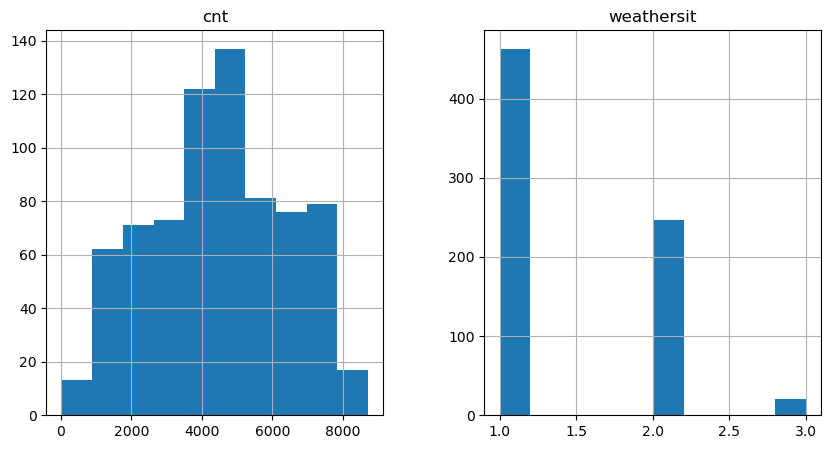

In [167]:
day_df[['cnt', 'weathersit']].hist(bins=10, figsize=(10, 5))


Pada histrogram di atas dapat di ketahui bahwa kolo cnt menghasilkan symmetric skewed sedangkan kolom weathersit menghasilkan right skewed

In [168]:

day_df[['cnt','weathersit']].corr()

,cnt,weathersit
cnt,1.000000,-0.297391
weathersit,-0.297391,1.000000


Berdasarkan korelasi di atas dihasilkan bahwa kolom cnt tidak memiliki korelasi dengan kolom  weathersit

untuk mengetahui kolom mana yang memiliki korelasi yang kuat kita akan menggunakan Heatmap pada semua kolom yang ada di day_df 

C:\Users\ES-20\AppData\Local\Temp\ipykernel_10052\1645867429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(),cmap="YlGnBu",annot=True,linewidths=.5, ax=ax)


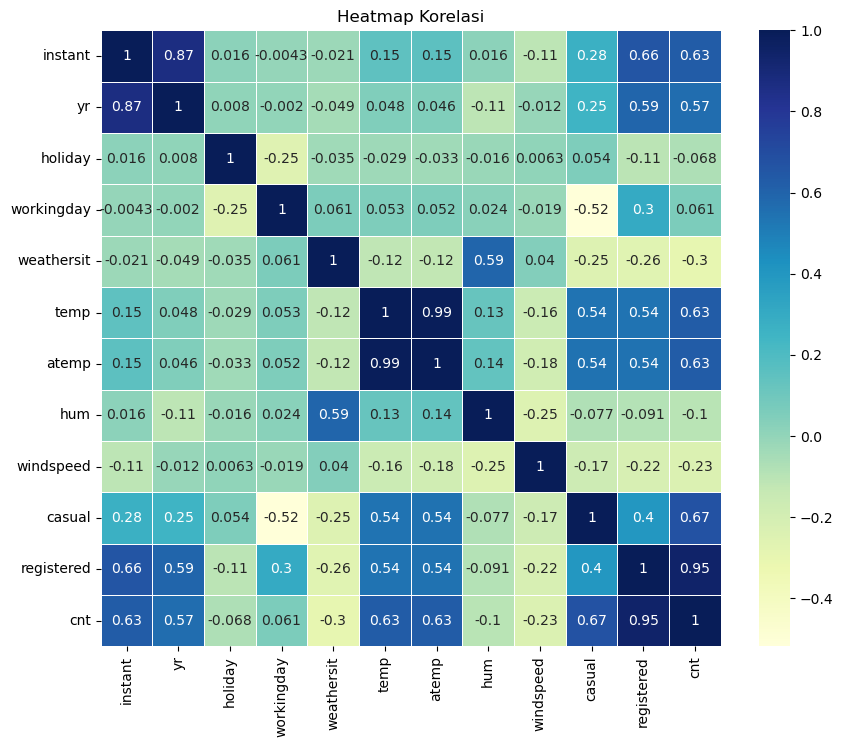

In [169]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(day_df.corr(),cmap="YlGnBu",annot=True,linewidths=.5, ax=ax)
ax.set_title("Heatmap Korelasi")
plt.show()

Dari hasil korelasi pada Heatmap di atas terdapat beberapa kolom yang memiliki korelasi yang kuat sebagai berikut :
- kolom "instan" dengan "yr"
- kolom "workingday" dengan "weathersit" dan "cnt"
- kolom "temp" dengan "atemp"
- kolom "hum" dengan "weathersit"
- kolom "casual dengan "cnt"
- kolom "registered" dengan "cnt"


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Seberapa besar faktor cuaca mempengaruhi penggunaan sepeda di layanan Bike Sharing?


In [170]:
weather_day_df = day_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"
    })
weather_day_df.head()

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


summary :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [171]:
print(day_df["weathersit"].nunique())

3


In [172]:
#mengubah tipe data weathersit menjadi object
def cuaca (weathersit):
    cuaca_name = {1:'clear', 2:'Mist cloudy', 3:'light Snow'}
    return cuaca_name.get(weathersit)
cuaca_list =[]
for weathersit in day_df['weathersit']:
    weathersit = cuaca(weathersit)
    cuaca_list.append(weathersit)
    
day_df['weathersit'] = cuaca_list

In [173]:
weather_day_df = day_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"
    })
weather_day_df.head()

,casual,registered,cnt
weathersit,,,
Mist cloudy,169776,827082,996858
clear,446346,1811606,2257952
light Snow,3895,33974,37869


Dari hasil di atas dapat di lihat bahwa nilai unik dari kolom "weathersit" memiliki 3 nilai unik dan itu membuktikan bahwa tidak ada pengguna yang menggunakan layanan Bike Sharing  pada "weathersit 4"(Heavy Rain)

In [174]:
weather_day_df = weather_day_df.reset_index()

In [175]:
weather_user_df = pd.melt(
    weather_day_df,
    id_vars=["weathersit"],
    value_vars=["casual","registered"],
    var_name="user",
    value_name="total")

In [176]:
weather_user_df

,weathersit,user,total
0,Mist cloudy,casual,169776
1,clear,casual,446346
2,light Snow,casual,3895
3,Mist cloudy,registered,827082
4,clear,registered,1811606
5,light Snow,registered,33974


In [177]:
weather_add = ['clear','Mist cloudy','light Snow']

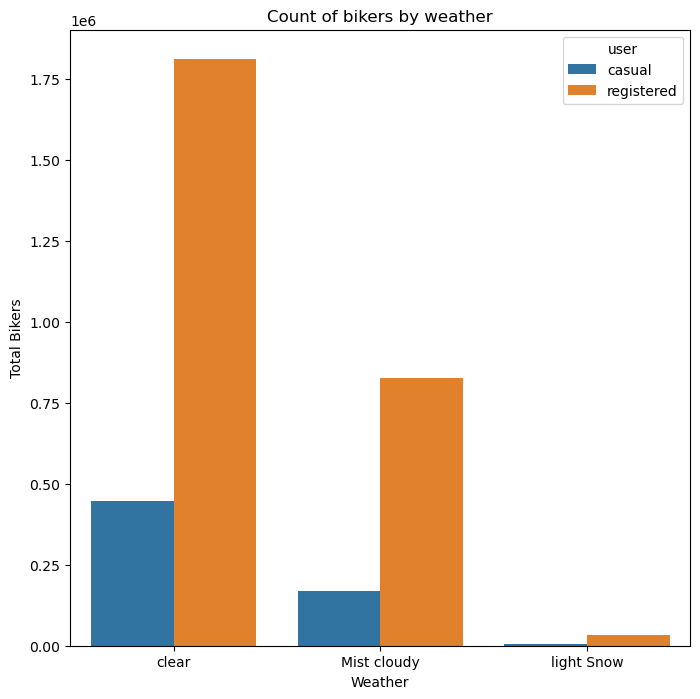

In [178]:
plt.figure(figsize=(8,8))
sns.barplot(x='weathersit',y='total',data=weather_user_df,order=weather_add,hue='user')
plt.xlabel("Weather")
plt.ylabel("Total Bikers")
plt.title("Count of bikers by weather")
plt.show()

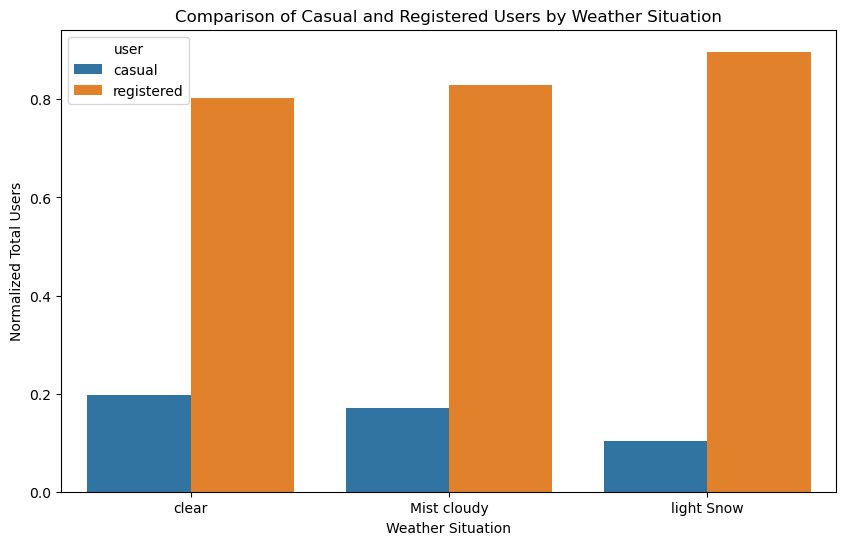

In [179]:
# Normalisasi data
weather_user_df['Total'] = weather_user_df.groupby('weathersit')['total'].transform(lambda x: x / x.sum())

# Membuat barplot dengan hue=user dan data yang telah dinormalisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_user_df, x="weathersit", y="Total", hue="user", order=weather_add)
plt.xlabel("Weather Situation")
plt.ylabel("Normalized Total Users")
plt.title("Comparison of Casual and Registered Users by Weather Situation")
plt.show()

### Pertanyaan 2: Pada musim apakah banyak orang menggunakan layanan Bike Sharing?


In [180]:
season_day_df = day_df.groupby('season').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

In [181]:
season_day_df


,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


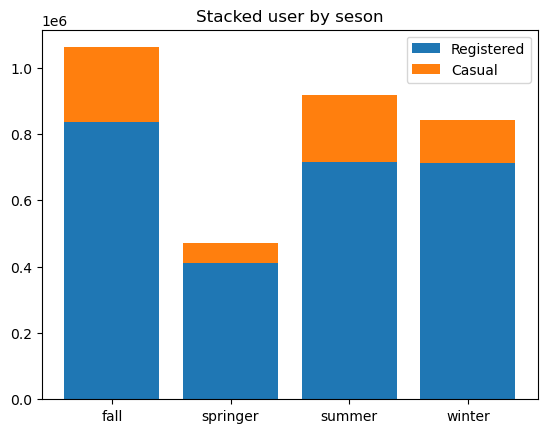

In [182]:
fig,ax = plt.subplots()
ax.bar(season_day_df.index,season_day_df['registered'],label='Registered')
ax.bar(season_day_df.index,season_day_df['casual'],label='Casual', bottom=season_day_df['registered'])
ax.set_title('Stacked user by seson')
ax.legend()
plt.show()

In [183]:
season_day_df = season_day_df.reset_index()

In [184]:
season_user_df = pd.melt(
    season_day_df,
    id_vars=["season"],
    value_vars=["casual","registered"],
    var_name="user",
    value_name="total")

In [185]:
season_user_df

,season,user,total
0,fall,casual,226091
1,springer,casual,60622
2,summer,casual,203522
3,winter,casual,129782
4,fall,registered,835038
5,springer,registered,410726
6,summer,registered,715067
7,winter,registered,711831


In [186]:
season_add = ['fall','springer','summer','winter']

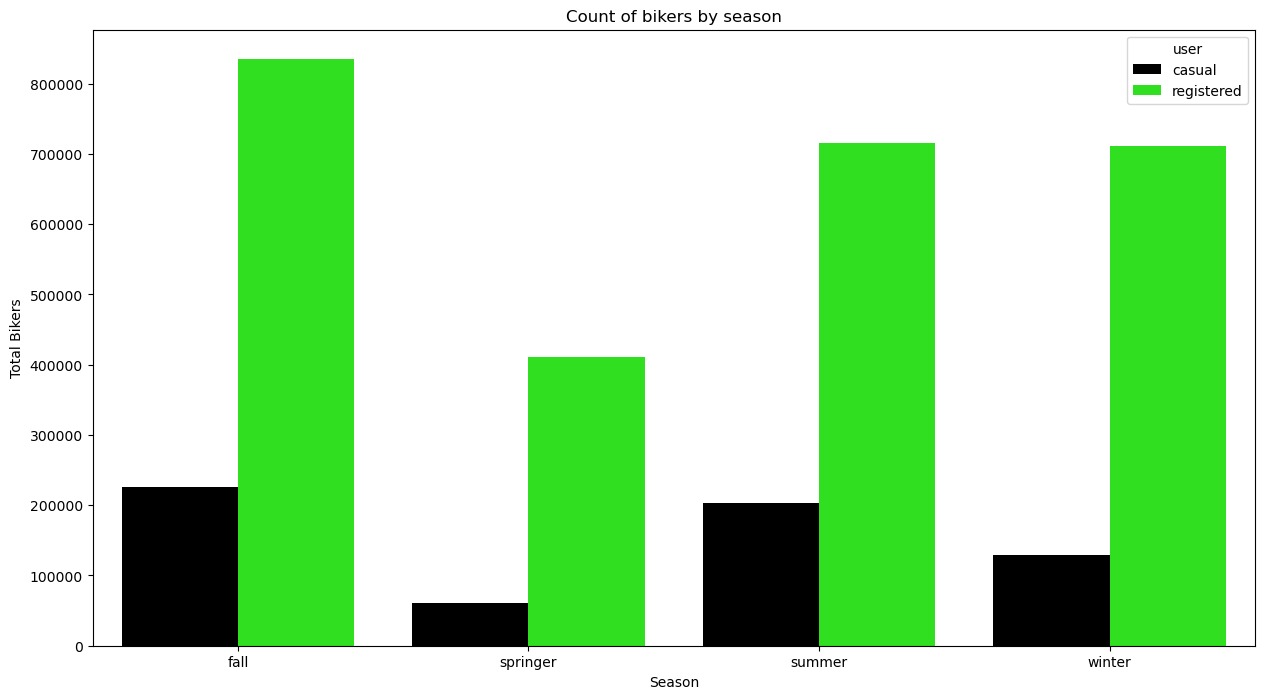

In [187]:
custom_palette = ["#000000", "#16FF00"] 

plt.figure(figsize=(15,8))
sns.barplot(x='season',y='total',data=season_user_df,order=season_add,hue='user',palette=custom_palette)
plt.xlabel("Season")
plt.ylabel("Total Bikers")
plt.title("Count of bikers by season")
plt.show()

### Pertanyaan 3: pada bulan apa banyak orang menggunakan layanan Bike Sharing?

In [188]:
month_day_df = day_df.groupby('mnth').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_index(ascending=True)

month_day_df

,casual,registered,cnt
mnth,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


In [189]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

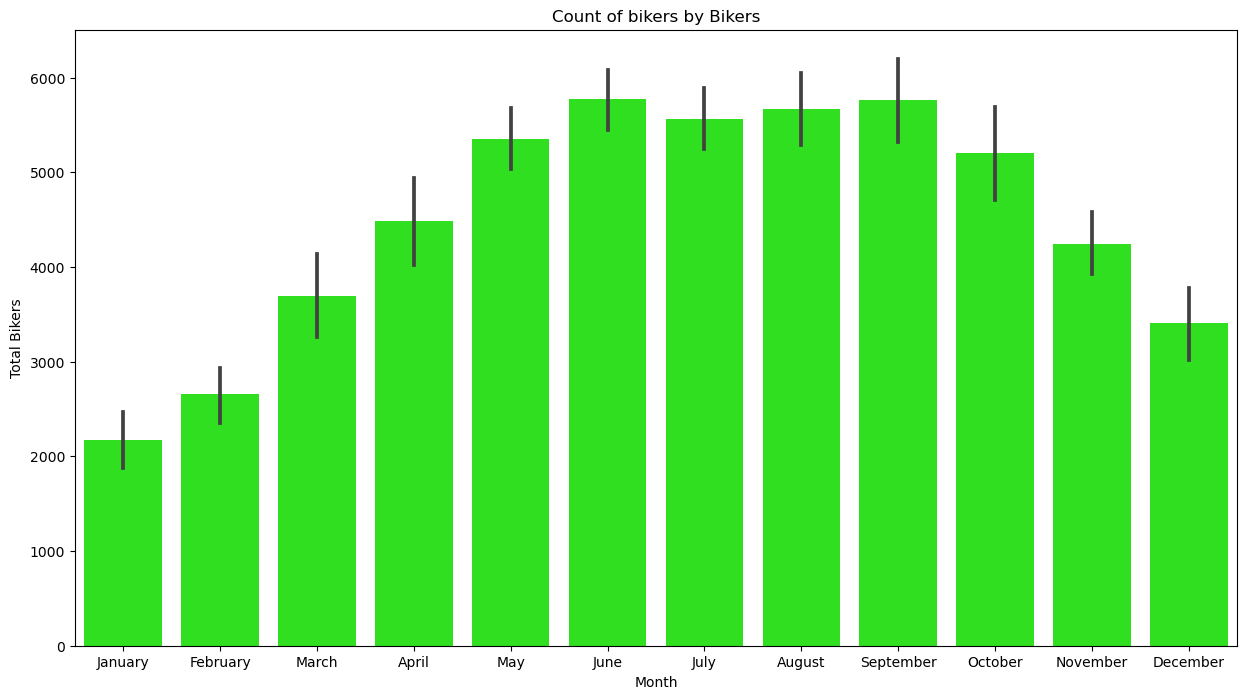

In [190]:
custom_palette = ["#16FF00"] 

plt.figure(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=day_df,order=month_order,palette=custom_palette)
plt.xlabel("Month")
plt.ylabel("Total Bikers")
plt.title("Count of bikers by Bikers")
plt.show()

total pengguna layanan Bikes Sharing berdasarkan Bulan

In [191]:
month_day_df = month_day_df.reset_index()
month_user_df = pd.melt(
    month_day_df,
    id_vars=["mnth"],
    value_vars=["casual","registered"],
    var_name="user",
    value_name="total")

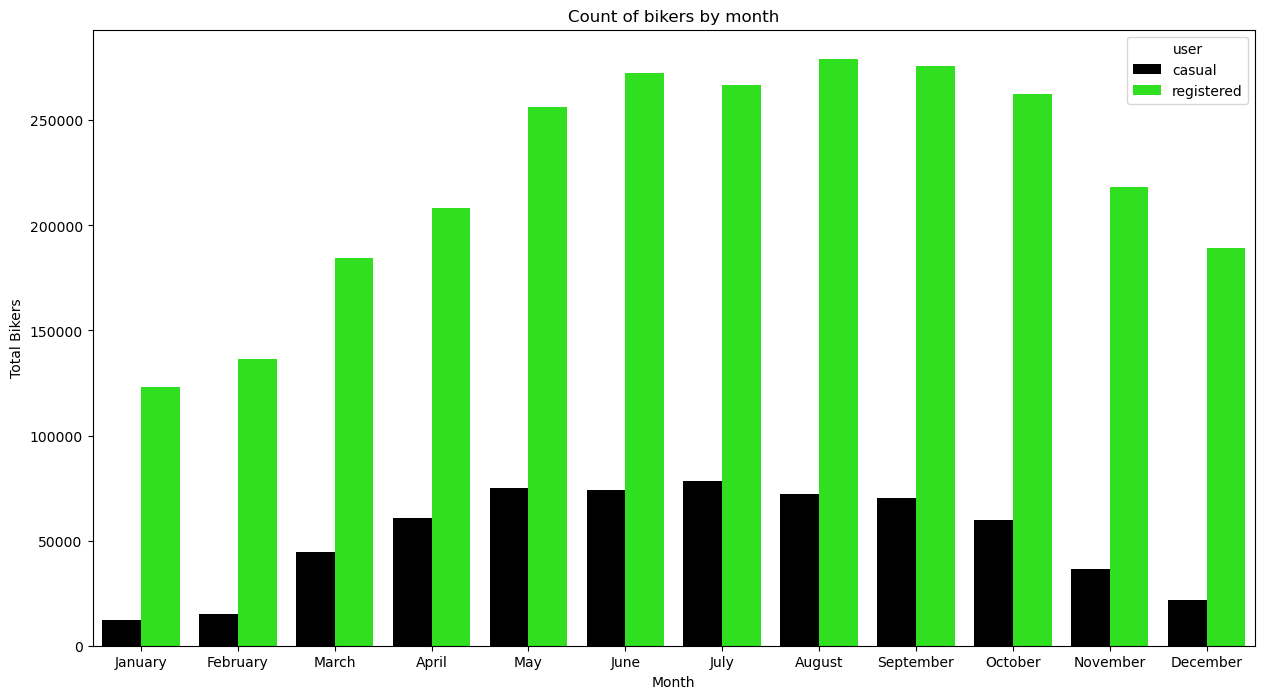

In [192]:
custom_palette = ["#000000", "#16FF00"] 

plt.figure(figsize=(15,8))
sns.barplot(x='mnth',y='total',data=month_user_df,order=month_order,hue='user',palette=custom_palette)
plt.xlabel("Month")
plt.ylabel("Total Bikers")
plt.title("Count of bikers by month")
plt.show()

## Conclusion

#### Pertanyaan 1 : Seberapa besar faktor cuaca mempengaruhi penggunaan sepeda di layanan Bike Sharing?


 - Berdasarkan cuaca orang orang akan banyak menggunakan layanan Bikes Sharing pada saat cuaca cerah (cerah) baik untuk pelanggan biasa (casual) atau terdaftar (registered),dengan membagi kedua kategori tersebut dapat dilihat pola bahwa pelanggan registered  lebih banyak dibanding pelanggan casual
 - Berdasarkan data di atas jika cuaca ringan(light snow,light rain) akan sangat sedikit orang orang menggunakan layanan Bike Sharing
 - Sebaliknya pada saat cuaca buruk (heavy snow, heavy rain dst) tidak ada satu orang pun yang menggunakan layanan Bike sharing ,sehingga tidak di sarankan Untuk membuka layanan pada saat kondid cuaca buruk

#### Pertanyaan 2 : Pada musim apakah banyak orang menggunakan layanan Bike Sharing?

- Musim yang paling banyak orang orang menggunakan layanan Bikes Sharing adalah musim gugur (fall)

#### Pertanyaan 3: pada bulan apa banyak orang menggunakan layanan Bike Sharing?

- Untuk pelangan registered banyak menggunakan layanan sepeda pada bulan agustus sedangkan,untuk pelanggan casual paling banyak menggunakan layanan bikes sharing pada bulan july
- untuk pelanggan registered dan casual keduanya memiliki pola penggunaan layanan bike sharing paling sedikit pada bulan januari

##### reference : fikrionii